# Table of Content #

- [Importing Necessary Libraries](#Importing-Necessary-Libraries)
- [Importing Data and First Checks](#Importing-Data-and-First-Checks)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

## Importing Necessary Libraries ##

In [1]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Setting style
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#Setting display options
pd.set_option('display.max_columns', 5000)
pd.options.display.max_rows = 4000

## Importing Data and First Checks ##

In [2]:
#Reading data from csv
data = pd.read_csv('~/ga/projects/capstone_data/data/delaysQ4_2018_cleaned.csv')

In [3]:
#Our DataFrame
data.head()

,Unnamed: 0,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,crs_dep_time,dep_delay,arr_delay,arr_del15,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier,total_delay
0,0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,905,-2.0,-17.0,0.0,1670.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
1,1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,1500,-2.0,-25.0,0.0,1670.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
2,2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1800,2.0,-13.0,0.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
3,3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,950,-3.0,-12.0,0.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
4,4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1150,1.0,-7.0,0.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0


In [4]:
#Size of data
data.shape

(1777932, 27)

In [5]:
#Dropping a technical column
data.drop(columns=['Unnamed: 0'], inplace=True)

#Getting data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777932 entries, 0 to 1777931
Data columns (total 26 columns):
month                  int64
day_of_month           int64
day_of_week            int64
fl_date                object
op_carrier             object
op_carrier_fl_num      int64
origin                 object
origin_city_name       object
origin_state_abr       object
origin_state_nm        object
dest                   object
dest_city_name         object
dest_state_abr         object
dest_state_nm          object
crs_dep_time           int64
dep_delay              float64
arr_delay              float64
arr_del15              float64
distance               float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
carrier                object
total_delay            float64
dtypes: float64(10), int64(5), object(11)
memory usage: 352.7+ MB


In [6]:
#Checking for missing values
data.isna().sum()

month                     0
day_of_month              0
day_of_week               0
fl_date                   0
op_carrier                0
op_carrier_fl_num         0
origin                    0
origin_city_name          0
origin_state_abr          0
origin_state_nm           0
dest                      0
dest_city_name            0
dest_state_abr            0
dest_state_nm             0
crs_dep_time              0
dep_delay                 0
arr_delay                 0
arr_del15              3163
distance                  0
carrier_delay             0
weather_delay             0
nas_delay                 0
security_delay            0
late_aircraft_delay       0
carrier                   0
total_delay               0
dtype: int64

## Exploratory Data Analysis ##

First of all, let's look at the CARRIER column. It shows an actual oprating carrier for each flight. We need to transform it as there're several "shuttle" carriers that fly the so-called feeder flights for larger airlines. As a customer, you're buying a ticket from one of these larger airlines and you may have no ide that one of the flights on your itinerary is performed by a "shuttle" airline playing a daughter company role for a larger carrier.

In [7]:
#A closer look at a CARRIER column
data['carrier'].value_counts()

SouthWest            337288
Delta Connection     251925
Delta AirLines       233132
American Airlines    227036
American Eagle       219312
United Airlines      158136
JetBlue               74470
Alaska Airlines       62321
MESA                  55158
Spirit Airlines       43047
United Express        42130
Frontier Airlines     29994
Allegiant Air         22777
Hawaiian Airlines     21206
Name: carrier, dtype: int64

There's one carrier with quite a large number of flights that is not "unique". It's MESA - a "shuttle" airline that  splits its activities between feeder flights for both United and American airlines under United Express and Amercan Eagle brands respectively.

In [8]:
#A closer look at MESA flights' origins
data[data['carrier'] == "MESA"]['origin'].value_counts().head(10)

DFW    9112
IAH    8357
IAD    5973
PHX    5235
ELP    1067
MAF     941
OKC     791
ABQ     711
DTW     670
CLT     610
Name: origin, dtype: int64

In [9]:
#A closer look at MESA flights' destinations
data[data['carrier'] == "MESA"]['dest'].value_counts().head(10)

DFW    9074
IAH    8348
IAD    5968
PHX    5217
ELP    1069
MAF     945
OKC     794
ABQ     713
DTW     671
SDF     613
Name: dest, dtype: int64

For the sake of conveniency and due to the humongous main data size, let's split our main DataFrame onto two separate sets - a DataFrame of MESA flights and a DataFrame with all other flights.

In [10]:
#Splitting into two DataFrames
data_main = data[data['carrier'] != "MESA"] #non-MESA flights
data_mesa = data[data['carrier'] == "MESA"] #MESA flights

After a closer look at the information on the origins and destinations of MESA flighths above, and having researched into the field, one can notice that MESA does feeder flights for United and American connecting their huns with secondaty and tertiaty destinations. It makes sense to try separating MESA flights between United Express (a feeder for United) and American Eagle (a feeder for American) basing on one of its flight's origin or destination being among United or American hubs respectedly. It must be noted for an advanced reader that the only hub these two airlines share is Chicago O'Hard (ORD), and MESA works there for United only. 

In [11]:
#Creating lists of UA and AA hubs
UA_hubs = ['IAH','IAD','ORD', 'DEN']
AA_hubs = ['LAX', 'PHX', 'CLT', 'DFW']

In [12]:
#Splitting MESA flights between United Express and American Eagle basing on a hub criteria
data_mesa['carrier'] = np.where(data_mesa['origin'].isin(UA_hubs),'United Express',data_mesa['carrier'])
data_mesa['carrier'] = np.where(data_mesa['origin'].isin(AA_hubs),'American Eagle',data_mesa['carrier'])
data_mesa['carrier'] = np.where(data_mesa['dest'].isin(UA_hubs),'United Express',data_mesa['carrier'])
data_mesa['carrier'] = np.where(data_mesa['dest'].isin(AA_hubs),'American Eagle',data_mesa['carrier'])   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value

In [13]:
#Checking the result
data_mesa['carrier'].value_counts()

American Eagle    28094
United Express    27064
Name: carrier, dtype: int64

It does look like the flights are nearly evenly split between American Eagle and United Express which corresponds to MESA open-source reports.

In [14]:
#Concatenating two DataFrames back
data = pd.concat([data_main, data_mesa], axis=0)

#Checking data shape
data.shape

(1777932, 26)

In [15]:
#Getting a closer look at CARRIERS column
data['carrier'].value_counts()

SouthWest            337288
Delta Connection     251925
American Eagle       247406
Delta AirLines       233132
American Airlines    227036
United Airlines      158136
JetBlue               74470
United Express        69194
Alaska Airlines       62321
Spirit Airlines       43047
Frontier Airlines     29994
Allegiant Air         22777
Hawaiian Airlines     21206
Name: carrier, dtype: int64

In order to create a more customer-friendly environment, we need to attribute all flights to the actual airline you may buy a ticket from. In order to do so we need to unite the main carriers (Delta, United and American) with their "shuttle"(or feeder) airlines (Delta Connection, American Eagle and United Express respectedly)

In [16]:
#Creating lists of airlines and their respected feeders
DL = ['Delta Connection', 'Delta AirLines']
AA = ['American Eagle', 'American Airlines']
UA = ['United Airlines', 'United Express']

In [17]:
#Attributing feeder flights to the main airline
data['carrier'] = np.where(data['carrier'].isin(DL),'Delta',data['carrier'])
data['carrier'] = np.where(data['carrier'].isin(AA),'American',data['carrier'])
data['carrier'] = np.where(data['carrier'].isin(UA),'United',data['carrier'])

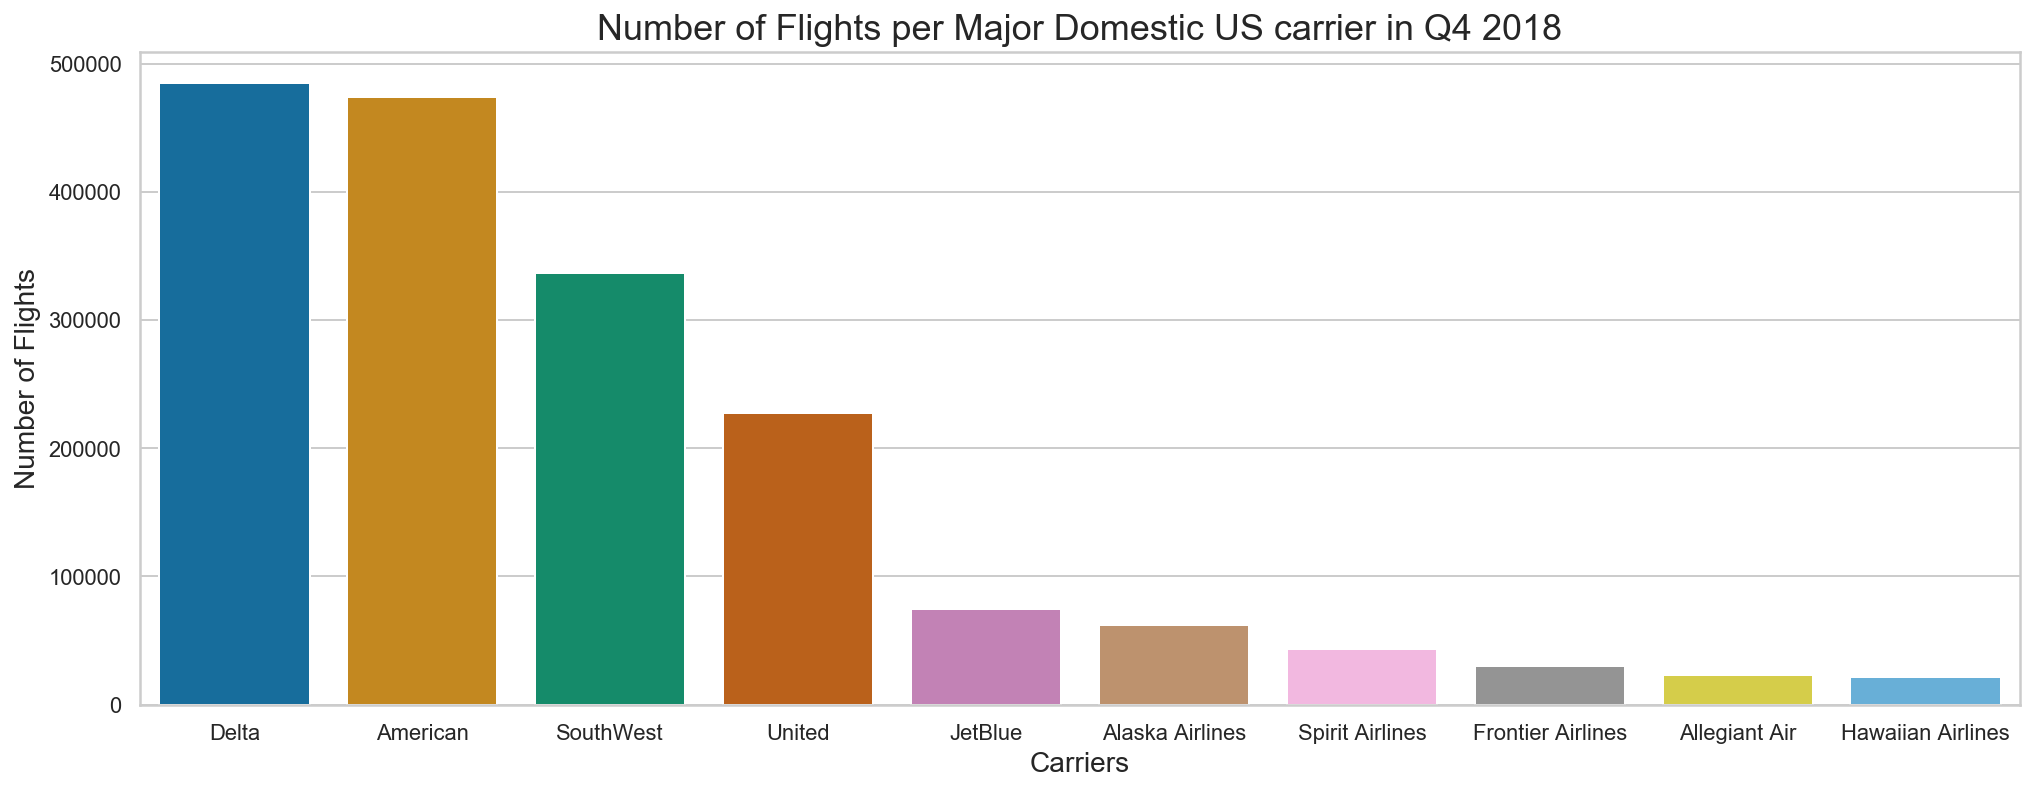

In [18]:
#For the sake of convenience - separate DataFrame of flights per carrier
flights = pd.DataFrame(data = data['carrier'].value_counts(), columns=['carrier'])

#Plotting a barchart
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15,6))

#Color coding is based on https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
sns.set_color_codes("colorblind")
pal = sns.color_palette("colorblind", len(flights))
rank = flights['carrier'].argsort().argsort()
sns.barplot(x=flights.index, y=flights['carrier'], data=flights,
            label="Number of Flights", palette=np.array(pal[::-1])[rank]);
plt.title(label = "Number of Flights per Major Domestic US carrier in Q4 2018", fontsize=18);
plt.ylabel("Number of Flights", fontsize=14);
plt.xlabel("Carriers", fontsize=14);

In [19]:
#A closer look at our flights grouped by carrier
data.groupby('carrier').describe()

month                                               \
                      count       mean       std   min   25%   50%   75%   
carrier                                                                    
Alaska Airlines     62321.0  10.987163  0.821523  10.0  10.0  11.0  12.0   
Allegiant Air       22777.0  11.001185  0.816092  10.0  10.0  11.0  12.0   
American           474442.0  10.985387  0.821058  10.0  10.0  11.0  12.0   
Delta              485057.0  10.979629  0.822515  10.0  10.0  11.0  12.0   
Frontier Airlines   29994.0  10.983763  0.819955  10.0  10.0  11.0  12.0   
Hawaiian Airlines   21206.0  11.002971  0.822715  10.0  10.0  11.0  12.0   
JetBlue             74470.0  11.007090  0.819880  10.0  10.0  11.0  12.0   
SouthWest          337288.0  10.994198  0.818617  10.0  10.0  11.0  12.0   
Spirit Airlines     43047.0  11.028155  0.816134  10.0  10.0  11.0  12.0   
United             227330.0  10.971632  0.820938  10.0  10.0  11.0  12.0   

                        day_of_month                                       \
                    max        count       mean       std  min  25%   50%   
carrier                                                                     
Alaska Airlines    12.0      62321.0  15.949744  8.853894  1.0  8.0  16.0   
Allegiant Air      12.0      22777.0  16.280590  8.758502  1.0  9.0  17.0   
American           12.0     474442.0  15.783093  8.850518  1.0  8.0  16.0   
Delta              12.0     485057.0  15.701567  8.768140  1.0  8.0  16.0   
Frontier Airlines  12.0      29994.0  15.810062  8.888003  1.0  8.0  16.0   
Hawaiian Airlines  12.0      21206.0  15.851127  8.841535  1.0  8.0  16.0   
JetBlue            12.0      74470.0  15.935343  8.855287  1.0  8.0  16.0   
SouthWest          12.0     337288.0  15.914569  8.827825  1.0  8.0  16.0   
Spirit Airlines    12.0      43047.0  16.035891  8.805979  1.0  8.0  16.0   
United             12.0     227330.0  15.721088  8.825462  1.0  8.0  16.0   

                              day_of_week                                     \
                    75%   max       count      mean       std  min  25%  50%   
carrier                                                                        
Alaska Airlines    24.0  31.0     62321.0  3.946182  2.013846  1.0  2.0  4.0   
Allegiant Air      24.0  31.0     22777.0  4.210212  2.079804  1.0  3.0  4.0   
American           23.0  31.0    474442.0  3.930717  2.007284  1.0  2.0  4.0   
Delta              23.0  31.0    485057.0  3.903646  1.999825  1.0  2.0  4.0   
Frontier Airlines  24.0  31.0     29994.0  3.997700  2.020342  1.0  2.0  4.0   
Hawaiian Airlines  23.0  31.0     21206.0  4.010799  2.011832  1.0  2.0  4.0   
JetBlue            24.0  31.0     74470.0  3.935934  2.019275  1.0  2.0  4.0   
SouthWest          24.0  31.0    337288.0  3.917940  2.006344  1.0  2.0  4.0   
Spirit Airlines    24.0  31.0     43047.0  4.078333  2.040191  1.0  2.0  4.0   
United             23.0  31.0    227330.0  3.916993  2.007352  1.0  2.0  4.0   

                            op_carrier_fl_num                            \
                   75%  max             count         mean          std   
carrier                                                                   
Alaska Airlines    6.0  7.0           62321.0   754.126057   560.585179   
Allegiant Air      6.0  7.0           22777.0  1185.797208   792.426293   
American           6.0  7.0          474442.0  3159.057040  1780.324387   
Delta              6.0  7.0          485057.0  3205.339676  1711.515629   
Frontier Airlines  6.0  7.0           29994.0  1087.492632   629.132404   
Hawaiian Airlines  6.0  7.0           21206.0   230.082571   162.993061   
JetBlue            6.0  7.0           74470.0  1012.270068   716.386269   
SouthWest          6.0  7.0          337288.0  2488.567260  1786.889139   
Spirit Airlines    6.0  7.0           43047.0   610.967245   342.702899   
United             6.0  7.0          227330.0  2370.193235  1878.522316   

              

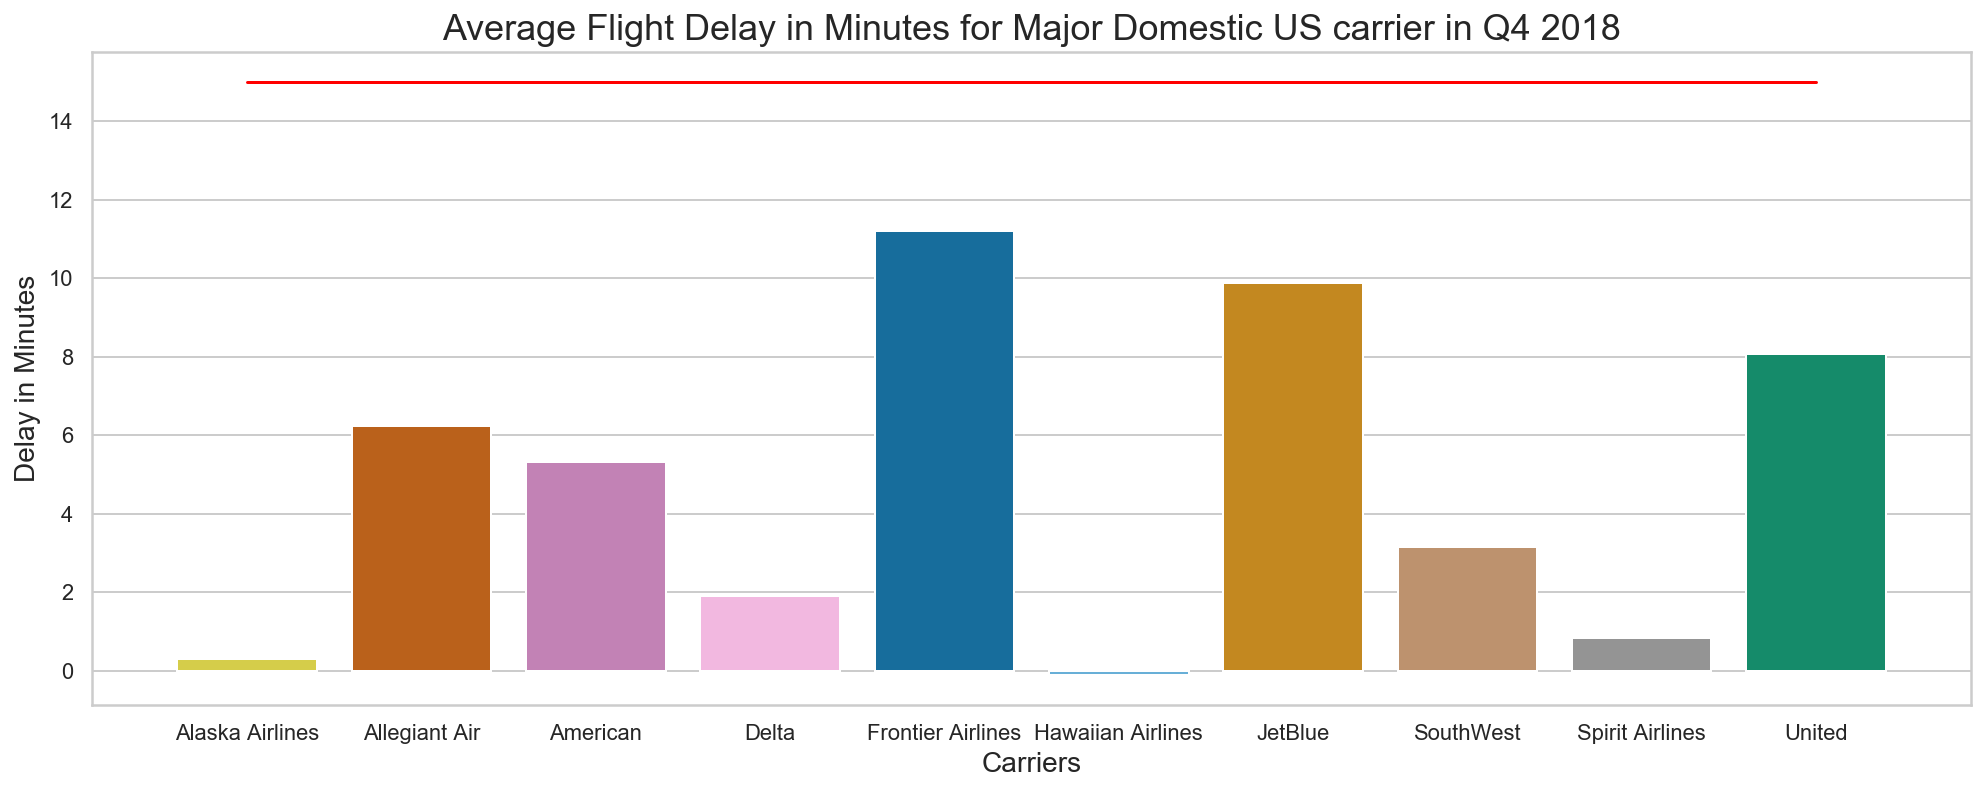

In [20]:
#For the sake of convenience - a separate DataFrame of delays by carrier
delay_by_carrier = pd.DataFrame(data.groupby('carrier')['arr_delay'].mean())

#Barchart of average delay by carriers
f, ax = plt.subplots(figsize=(15,6))

#Color coding is based on https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
sns.set_color_codes("colorblind")
pal = sns.color_palette("colorblind", len(flights))
rank = delay_by_carrier['arr_delay'].argsort().argsort()

sns.barplot(x=delay_by_carrier.index, y=delay_by_carrier['arr_delay'], data=delay_by_carrier,
            label="", palette=np.array(pal[::-1])[rank]);

#Plotting a horizontal line for a "true delay" of 15 minutes cut-off
sns.lineplot(x=delay_by_carrier.index, y=15.0, color='red')

plt.title(label = "Average Flight Delay in Minutes for Major Domestic US carrier in Q4 2018", fontsize=18);
plt.ylabel("Delay in Minutes", fontsize=14);
plt.xlabel("Carriers", fontsize=14);

This chart shows that an average delay for all US carriers is below the 15 minutes cap.

In [21]:
#Sorting explained delays by their reason for every airline into a separate DataFrame
delay_by_reason = pd.DataFrame(100*round(data[data['total_delay']>0].groupby('carrier')[ 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'].mean(),2))
delay_by_reason

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
carrier,,,,,
Alaska Airlines,20.0,2.0,48.0,0.0,28.0
Allegiant Air,27.0,4.0,23.0,1.0,43.0
American,26.0,3.0,33.0,0.0,35.0
Delta,24.0,4.0,34.0,0.0,36.0
Frontier Airlines,27.0,1.0,30.0,0.0,39.0
Hawaiian Airlines,66.0,2.0,3.0,1.0,28.0
JetBlue,31.0,1.0,30.0,0.0,35.0
SouthWest,29.0,1.0,17.0,0.0,48.0
Spirit Airlines,19.0,1.0,58.0,1.0,19.0


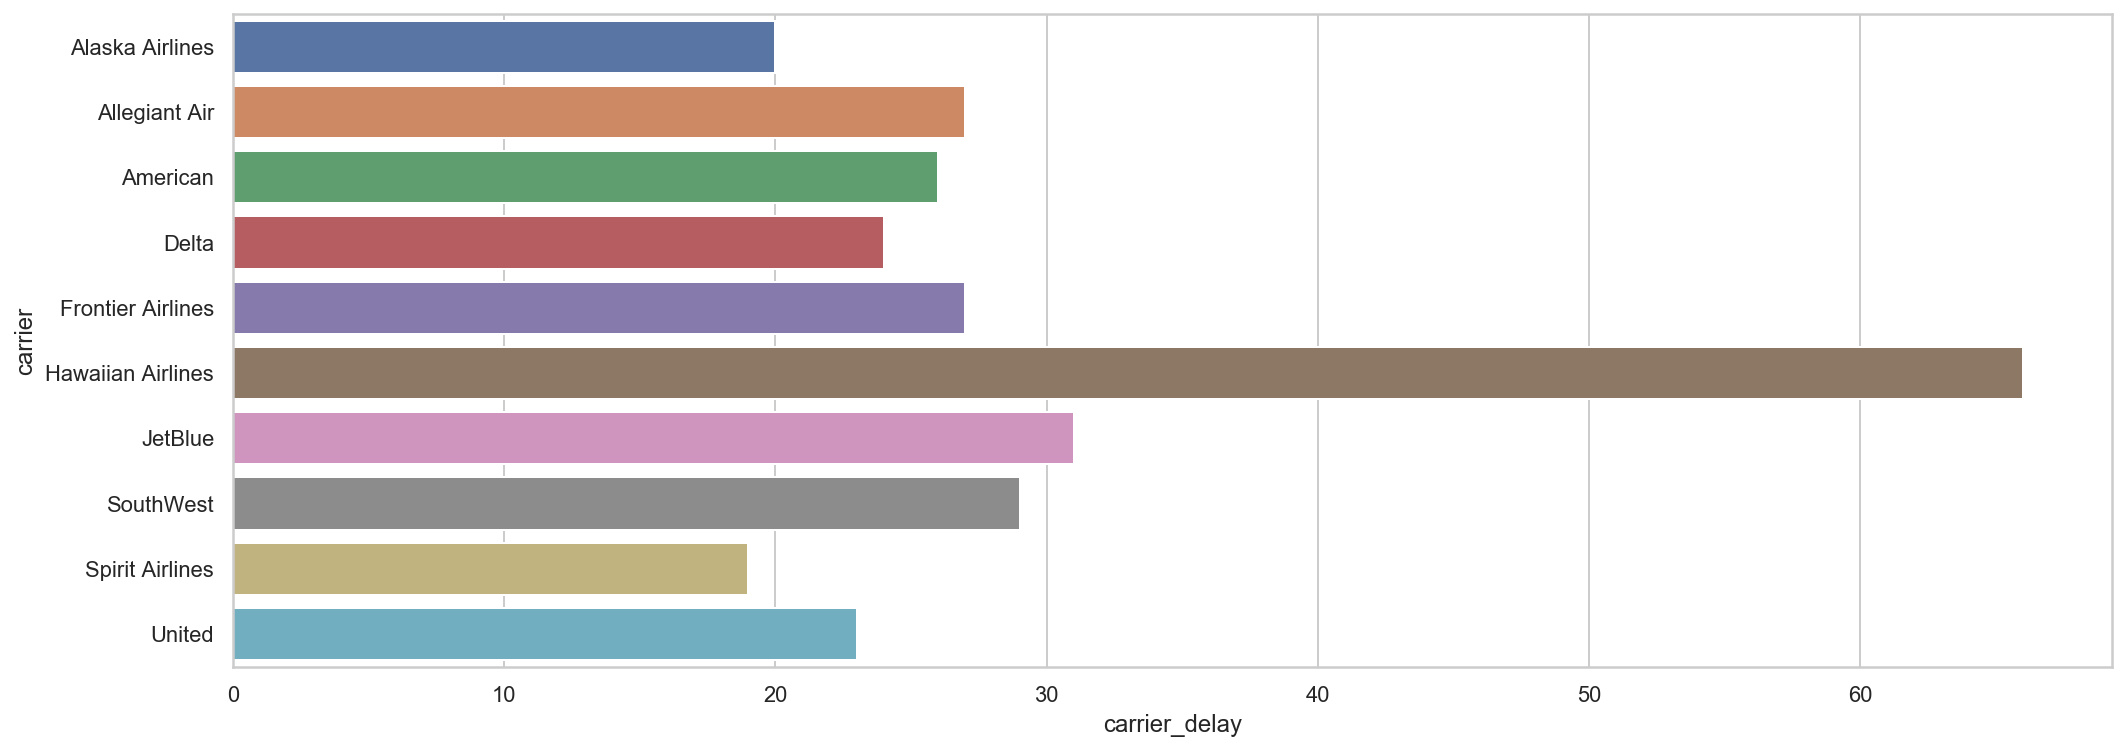

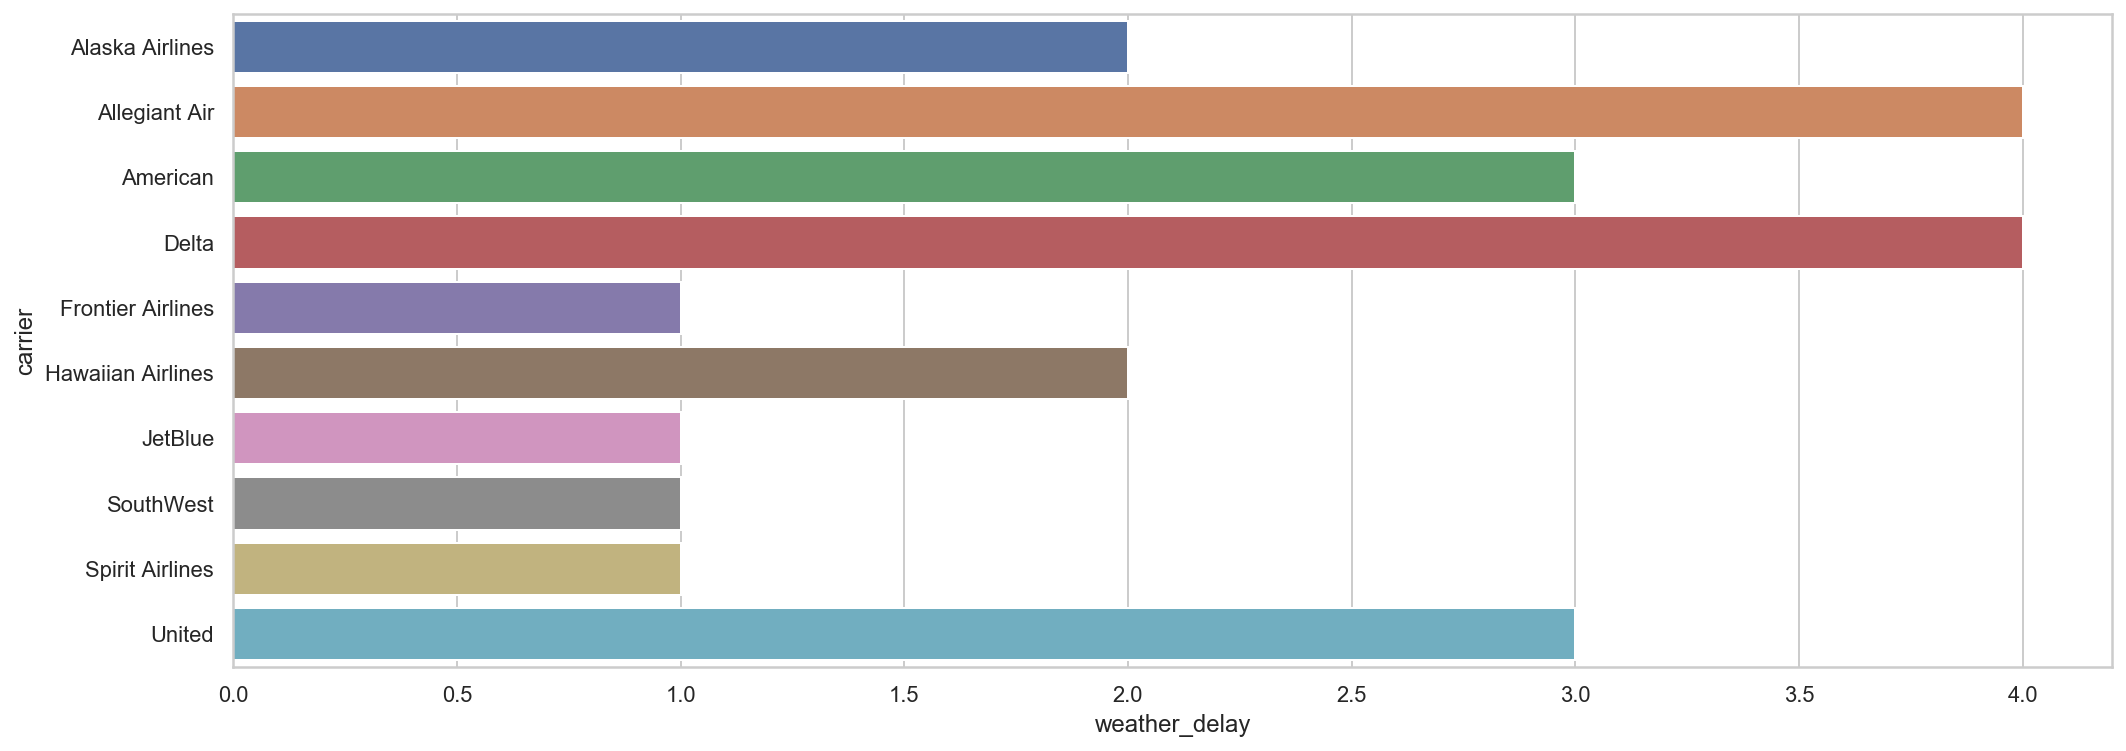

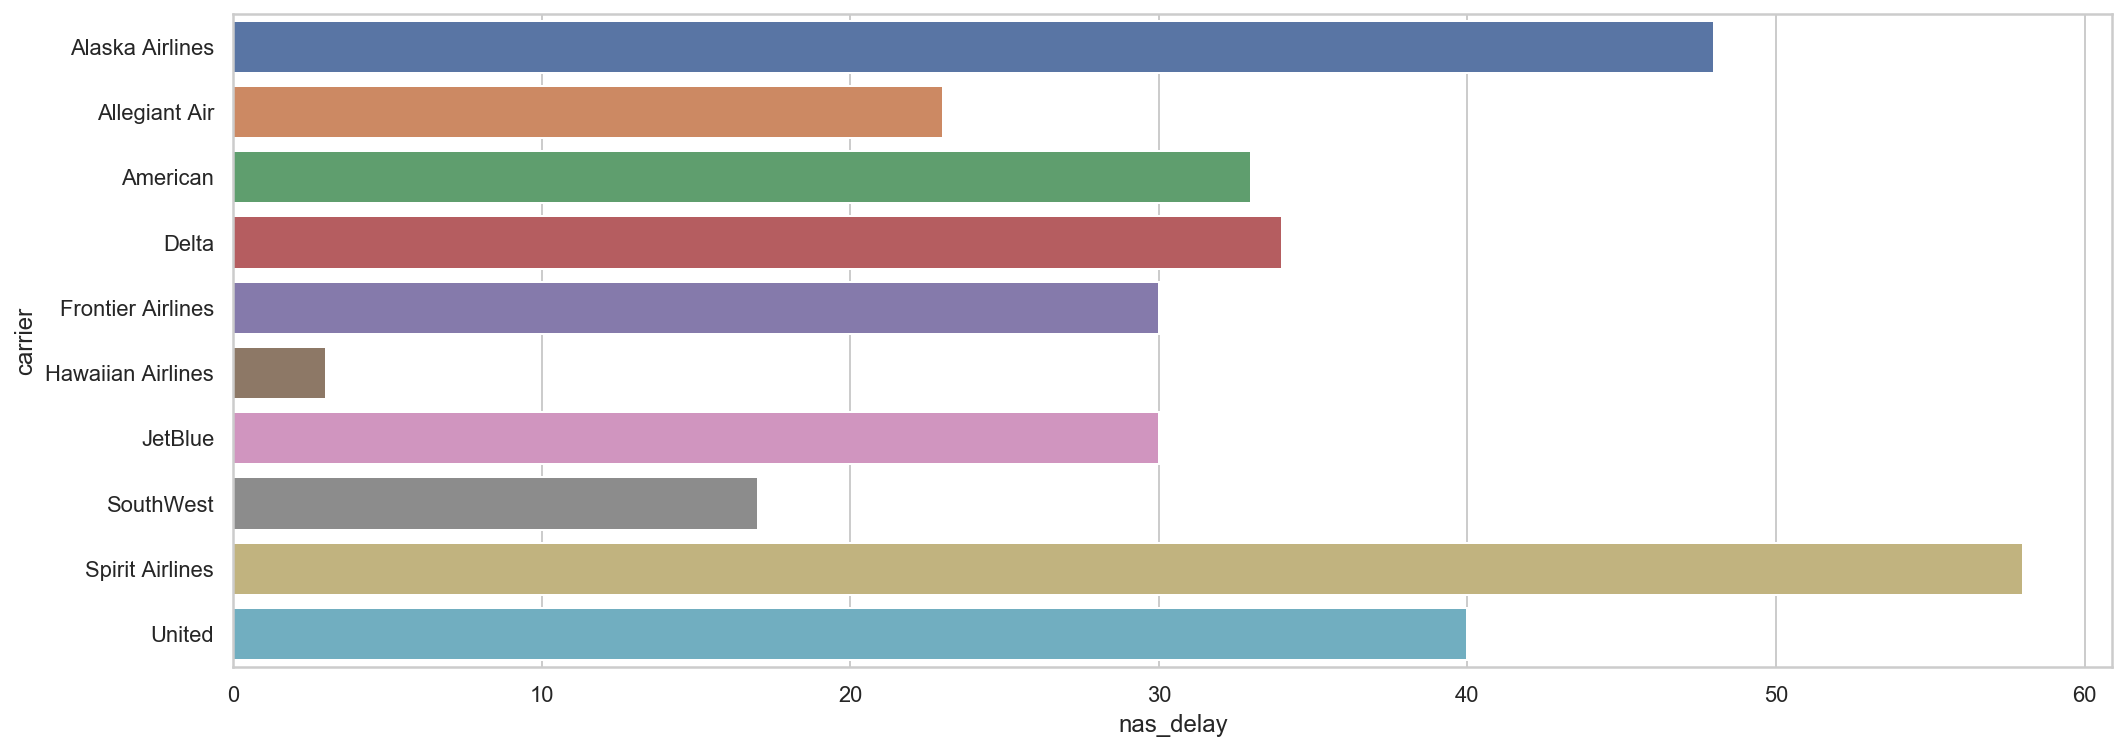

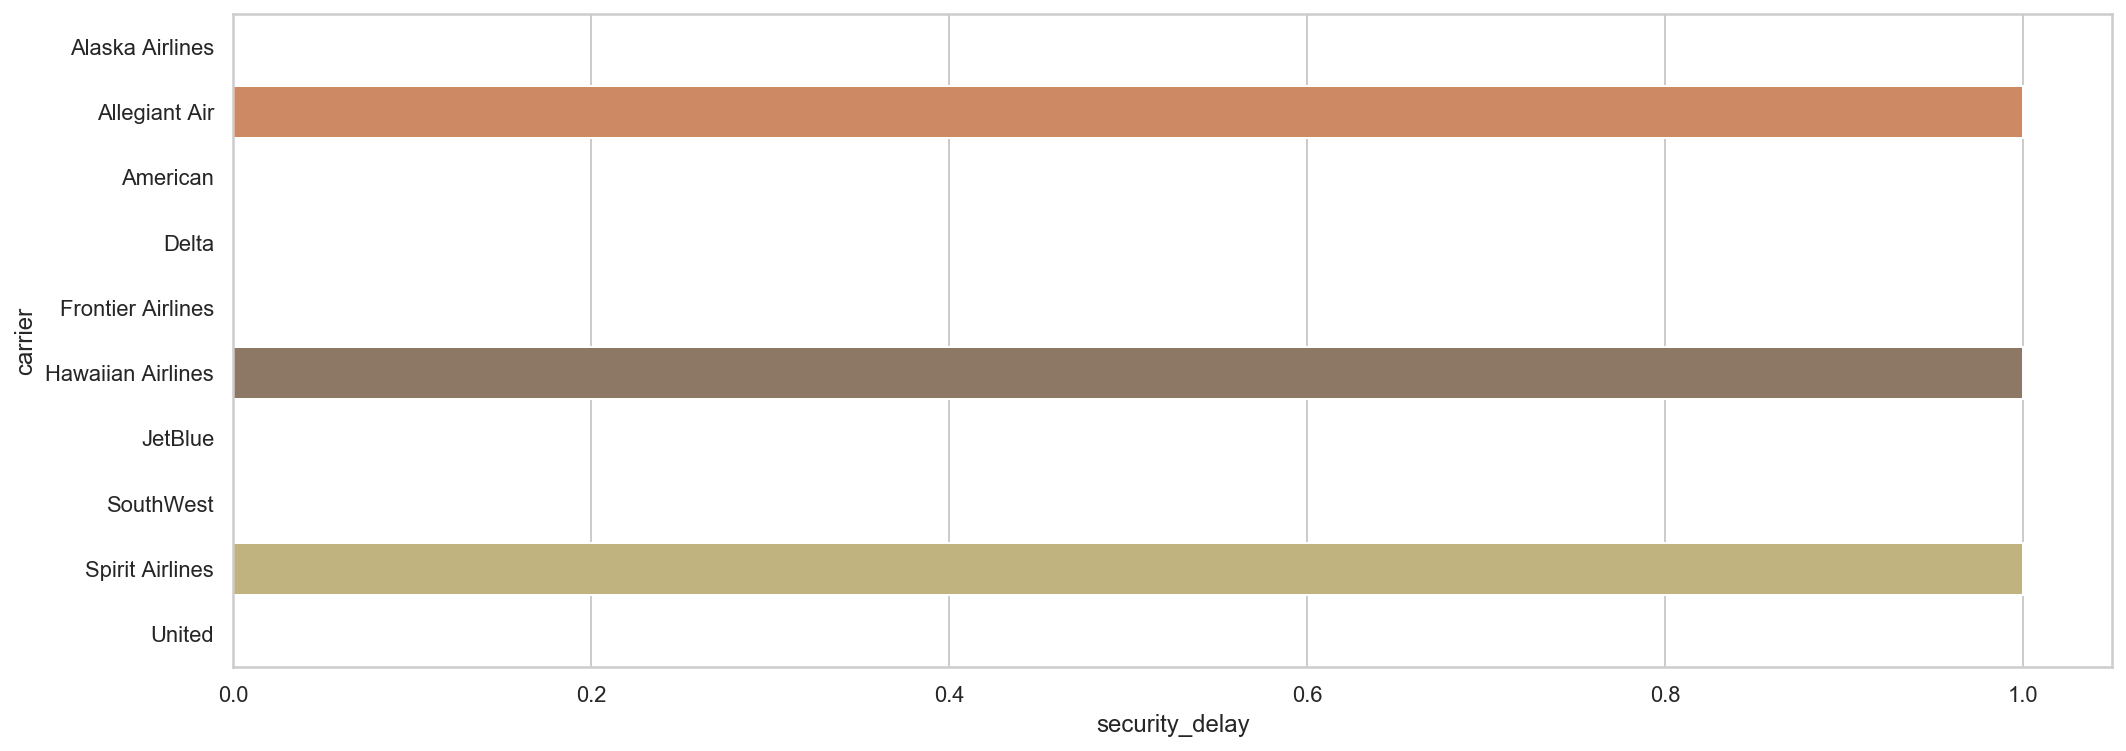

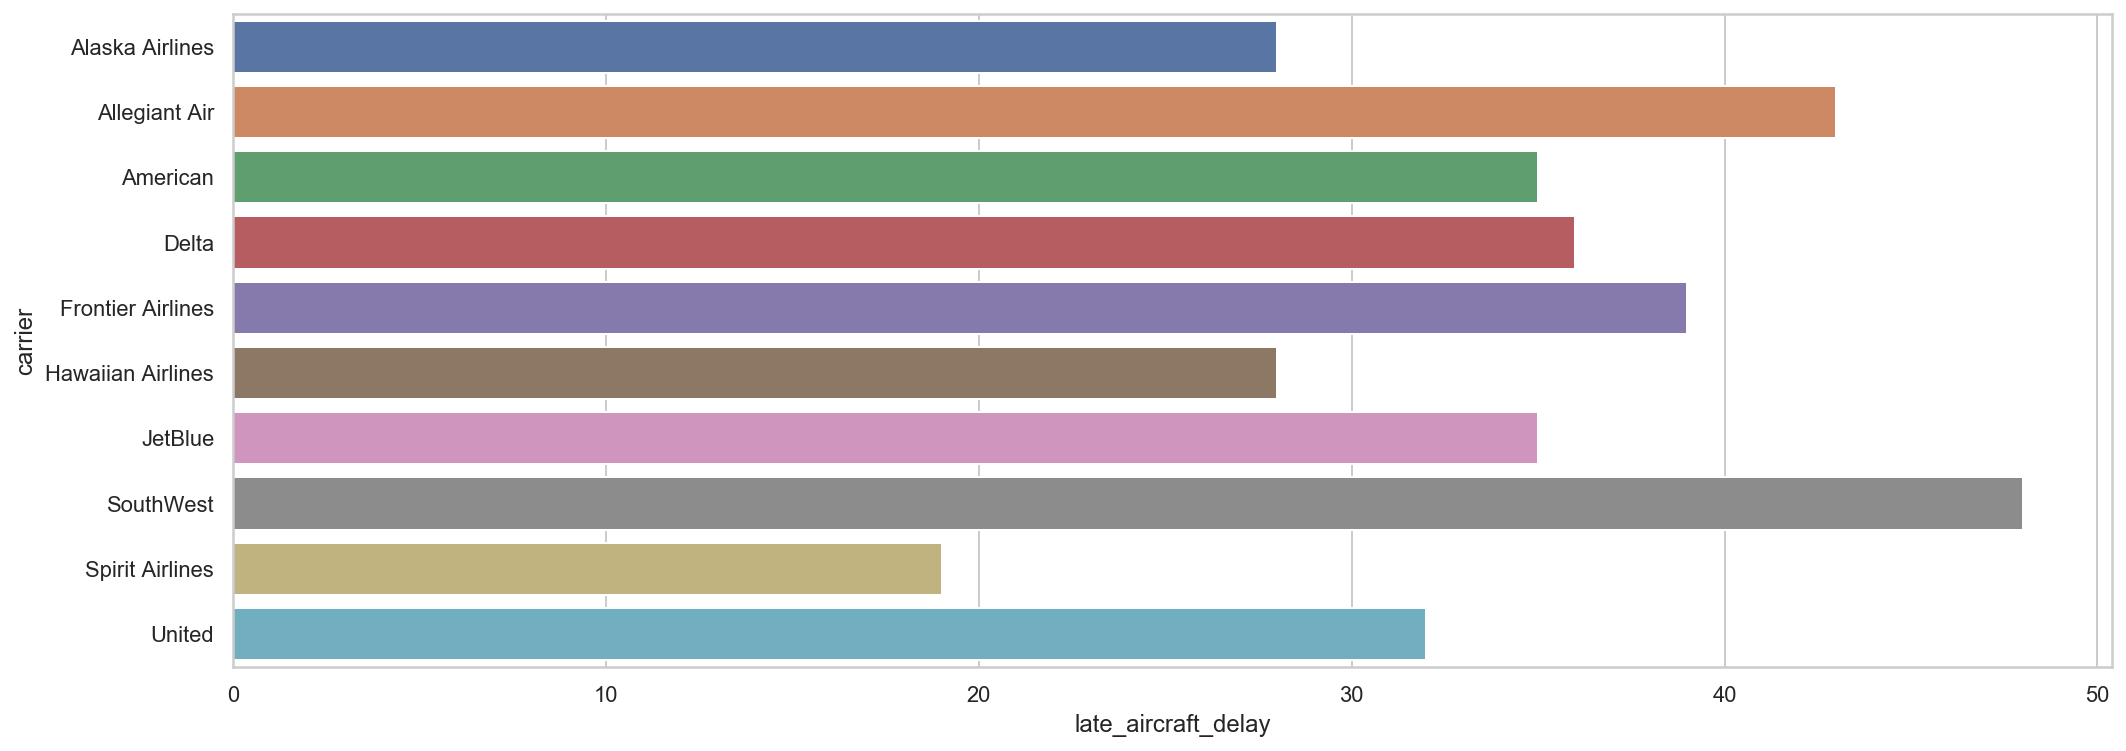

In [22]:
#Plotting barcharts of percentage of explained delay by a delay's reason by carrier
for column in delay_by_reason.columns:
    f, ax = plt.subplots(figsize=(15,6))
    sns.set_color_codes("colorblind")
    sns.barplot(y=delay_by_reason.index, x=delay_by_reason[column], data=delay_by_reason,
                label=column);


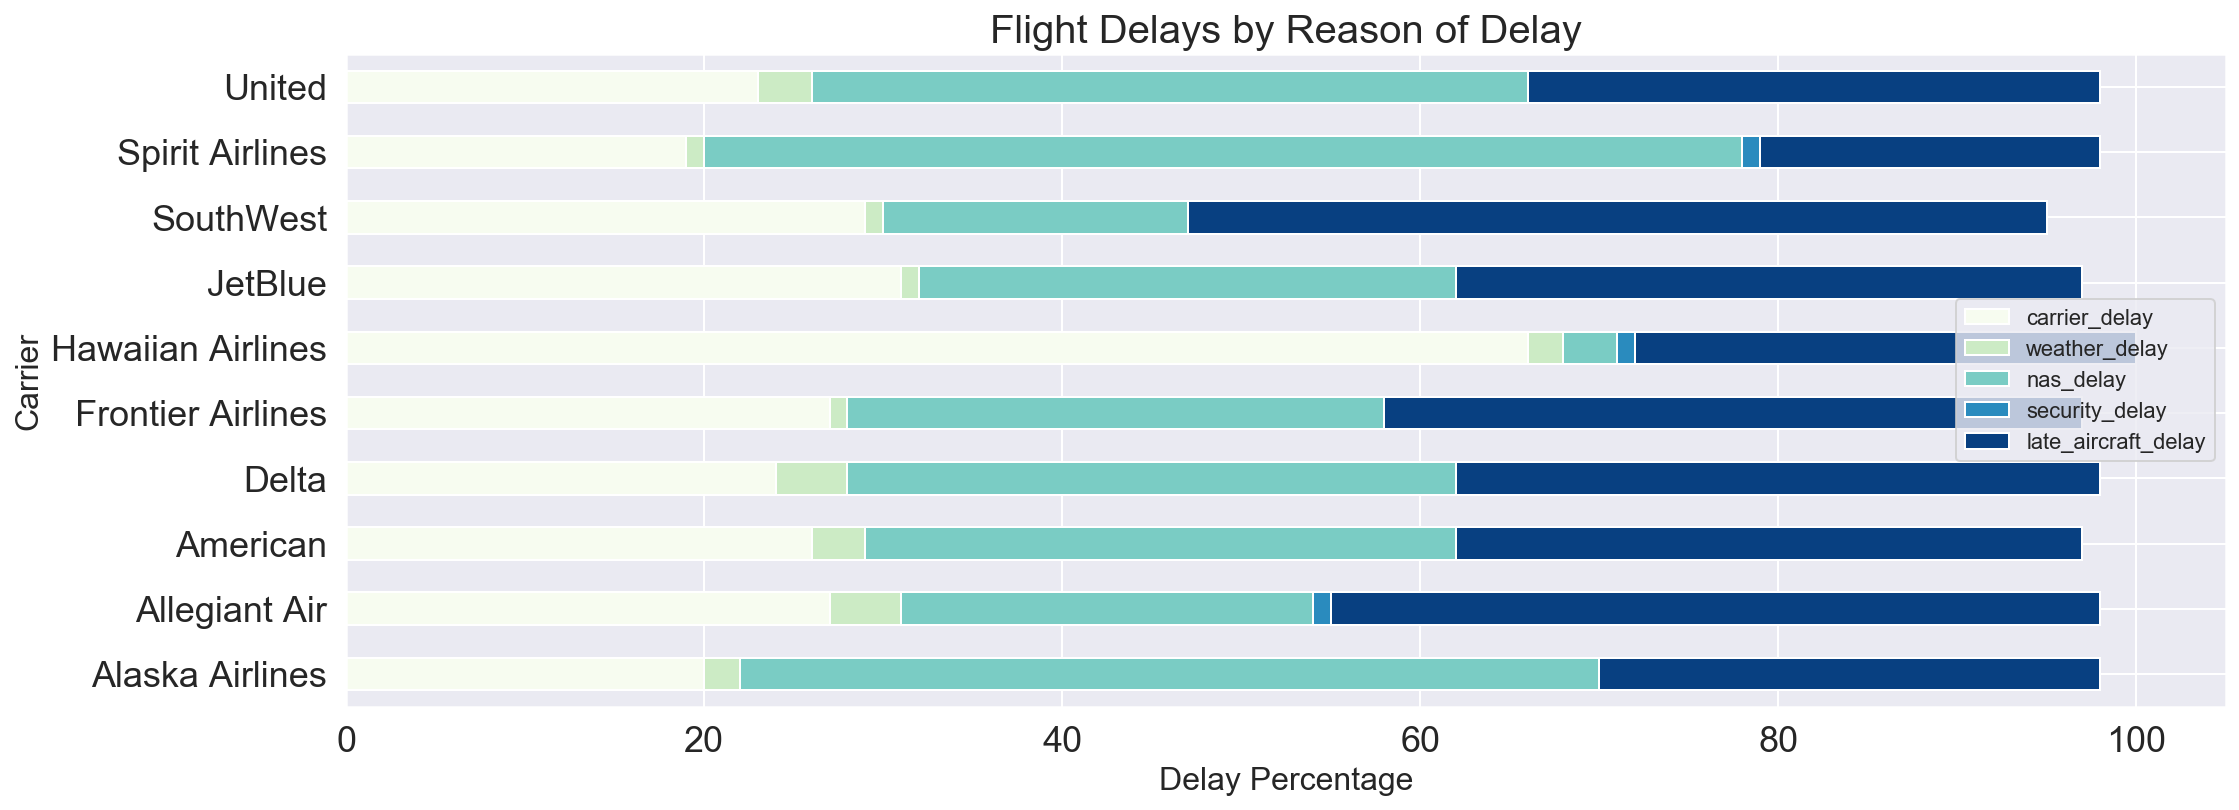

In [23]:
#Plotting a stacked bar chart of percentages of explained delay by reason by carrier
sns.set()
delay_by_reason.plot(kind='barh',
                     figsize=(15,6),
                     stacked=True,
                    fontsize=18,
                    colormap='GnBu');

plt.title('Flight Delays by Reason of Delay', fontsize=20);
plt.xlabel('Delay Percentage', fontsize = 16)
plt.ylabel('Carrier', fontsize = 16)
plt.legend(loc =0);

In [24]:
#A closer look at our future target 
data['arr_delay'].describe()

count    1.777932e+06
mean     4.276324e+00
std      4.741508e+01
min     -7.400000e+01
25%     -1.400000e+01
50%     -6.000000e+00
75%      7.000000e+00
max      2.153000e+03
Name: arr_delay, dtype: float64

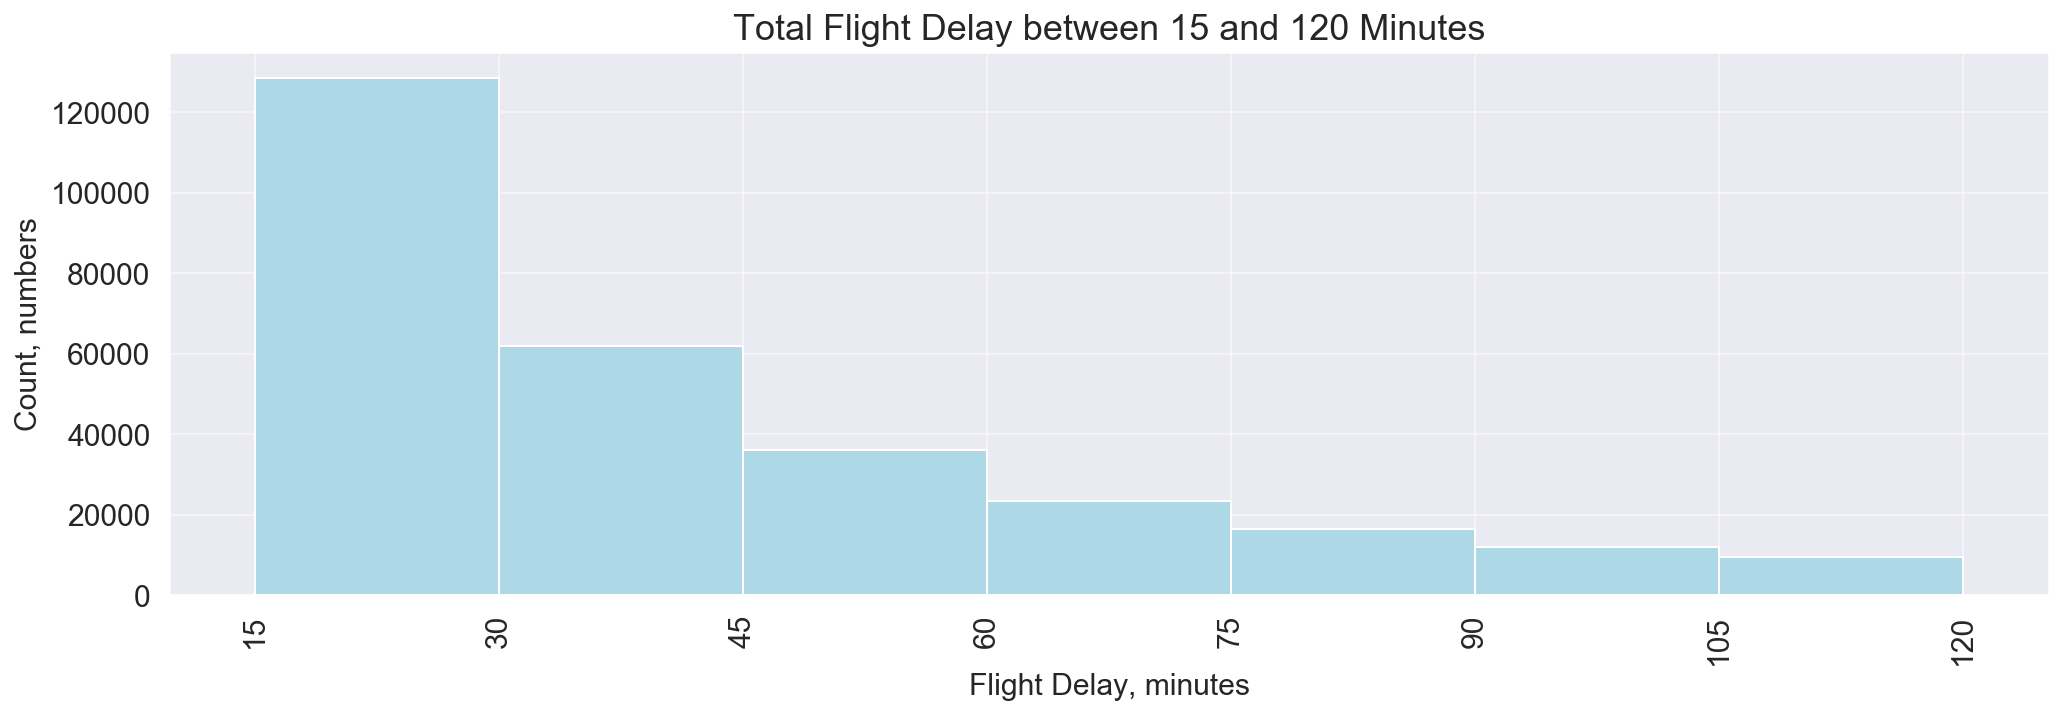

In [25]:
#Distribution plot for arrival delays between 15 and 120 minutes 
x_min = 15
x_max = 121
x_steps = 15
x_range = list(range(x_min, x_max, x_steps))

plt.figure(figsize = (15,5))
plt.hist(data['arr_delay'], color = 'lightblue', bins = x_range);
plt.title('Total Flight Delay between 15 and 120 Minutes', fontsize = 18)
plt.xlabel('Flight Delay, minutes', fontsize=15)
plt.ylabel('Count, numbers', fontsize = 15)
plt.xticks(ticks = x_range, fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
plt.grid( alpha =0.5);

## Feature Engineering ##

**This part is done on Noah Christiansen's advice in an attempt to improve existing models performance**

A lot of times our flight delay for a domestic flight is caused by the aircraft being deployed in a number of consequitive flights that day ("city-hoping"), and the later the day the flight departure is scheduled, the higher are the odds of a delay. Experienced business travelers know that fact really well, and always expect a flight late in the evening to be delayed by definition. If you refer back to the bar chart of explained delay distributions by type of delay, you'd notice that a so-called "late aircraft delay" accounts roughly for about 20-50% of all explained delays hence being the major category! Since we do have in our initial data a feature "CRS_DEP_TIME" which is exactly an hour of the day where the flight departure is scheduled to happen (Computer Reservation System Departure Time, to be precise) it's natural to try using hourly departure time slots as delay predictors.

In [26]:
#Data type
data['crs_dep_time'].dtypes

dtype('int64')

In [27]:
#Let's introduce a new feature DEP_HOUR
data['dep_hour'] = data['crs_dep_time']//100

#Now we could safely drop CRS_DEP_TIME column
data.drop(columns=['crs_dep_time'], axis=1, inplace=True)

#For the sake of convenience - separate DataFrame of flights per carrier
dep_hour = pd.DataFrame(data['dep_hour'].value_counts())
dep_hour.columns = ['count']

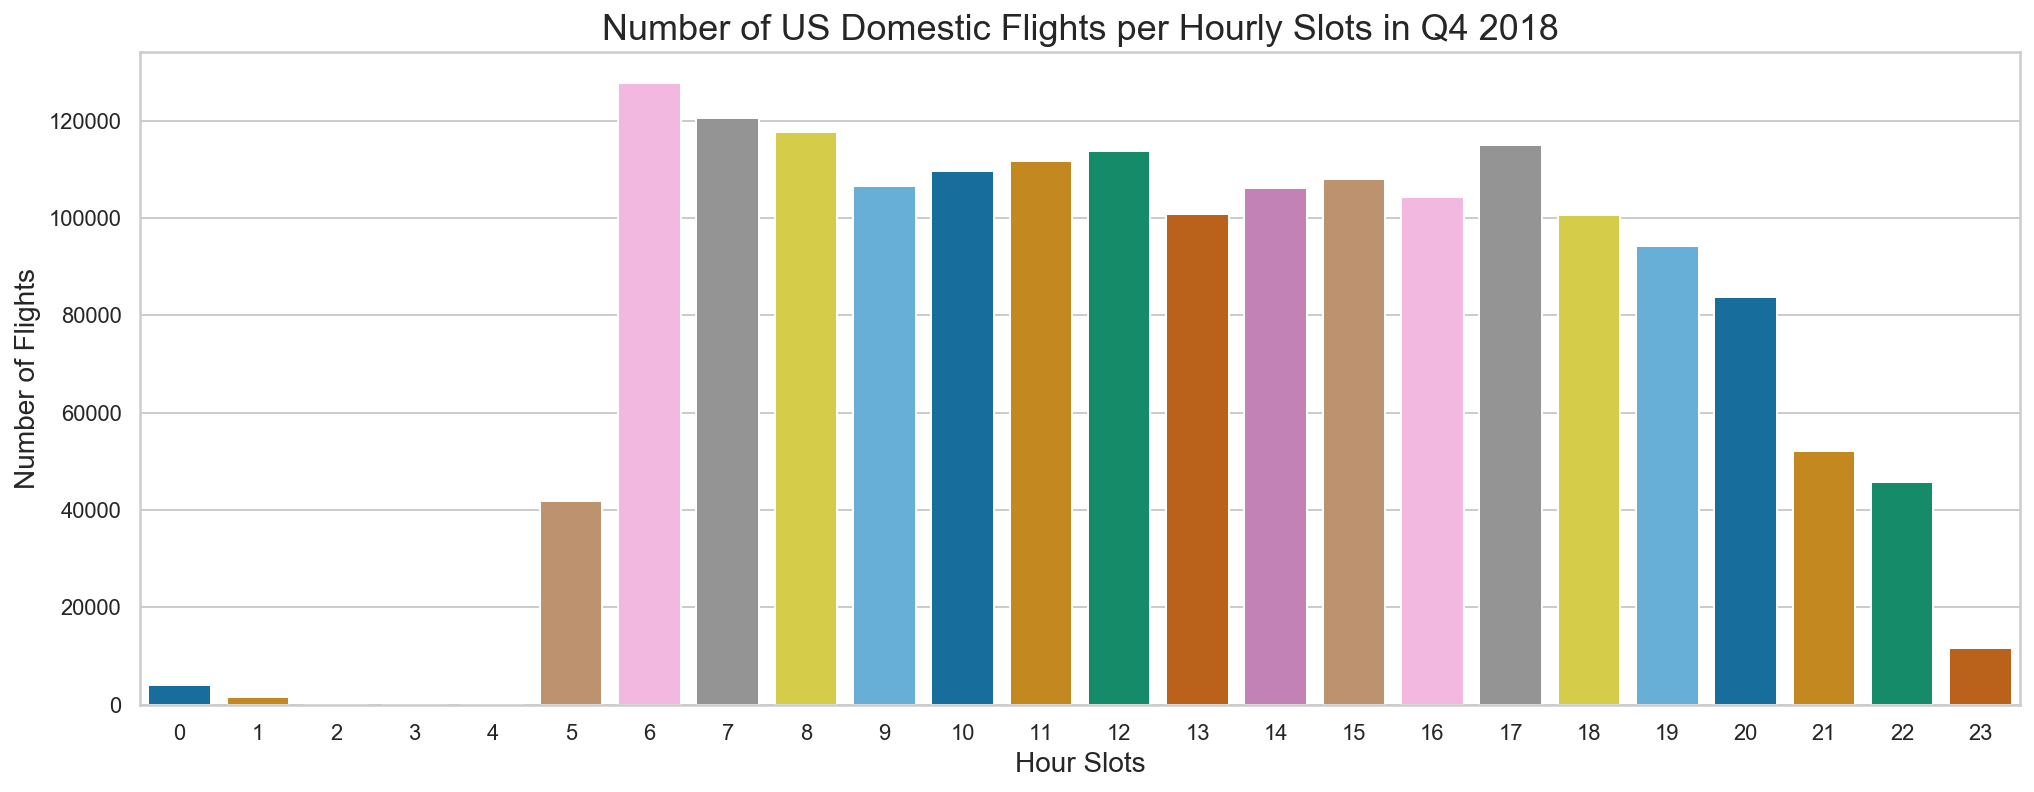

In [28]:
#Visualizing our hourly flight distribution

#Plotting a barchart
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(15,6))

#Color coding is based on https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
sns.set_color_codes("colorblind")
pal = sns.color_palette("colorblind", len(dep_hour))
rank = dep_hour['count'].argsort().argsort()
sns.barplot(x=dep_hour.index, y=dep_hour['count'], data=dep_hour,
            label="Number of Flights", palette=np.array(pal[::-1])[rank]);
plt.title(label = "Number of US Domestic Flights per Hourly Slots in Q4 2018", fontsize=18);
plt.ylabel("Number of Flights", fontsize=14);
plt.xlabel("Hour Slots", fontsize=14);

In [29]:
#Saving our data into a csv file for modeling
data.to_csv('~/ga/projects/capstone_data/data/data_model.csv')